# Titanic

## Boilerplate

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.formula.api import logit

import pylab as pl
import seaborn as sns

mpl.style.use('fivethirtyeight')
%matplotlib inline

## Read the data

In [2]:
# Let's set up a URL to the file, which in this case is hosted on Github
base_url = 'https://raw.githubusercontent.com/johnjfox/Analytic_Enterprise/master/data/'
data_url = 'titanic/titanic_train.csv'
url = base_url + data_url

train_df = pd.read_csv(url)
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
612,613,1,3,"Murphy, Miss. Margaret Jane",female,NaN,1,0,367230,15.5000,NaN,Q
511,512,0,3,"Webber, Mr. James",male,NaN,0,0,SOTON/OQ 3101316,8.0500,NaN,S
380,381,1,1,"Bidois, Miss. Rosalie",female,42,0,0,PC 17757,227.5250,NaN,C
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31,0,0,PC 17590,50.4958,A24,S
190,191,1,2,"Pinsky, Mrs. (Rosa)",female,32,0,0,234604,13.0000,NaN,S


In [3]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Transforming the Original Data Using a Mapped Dictionary

In [4]:
# just for the fun of it, let's create a new column consisting of a remapped 'sex' variable
train_df['Gender'] = train_df['Sex'].map({'female':0, 'male':1}).astype(int)
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1


In [5]:
# mapping from an integer to a "categorical"
train_df['alive?'] = train_df['Survived'].map({0:'dead', 1:'alive'})
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,alive?
304,305,0,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.05,NaN,S,1,dead
749,750,0,3,"Connaghton, Mr. Michael",male,31,0,0,335097,7.75,NaN,Q,1,dead
126,127,0,3,"McMahon, Mr. Martin",male,NaN,0,0,370372,7.75,NaN,Q,1,dead
615,616,1,2,"Herman, Miss. Alice",female,24,1,2,220845,65.00,NaN,S,0,alive
59,60,0,3,"Goodwin, Master. William Frederick",male,11,5,2,CA 2144,46.90,NaN,S,1,dead


## Transforming the Original Data Using a User Defined Function

In [6]:
# finally, let's demonstrate the construction and application of a simple function to each element

def age_bin(age):
    if (age < 1):
        return 'infant'
    if (age < 13):
        return 'child'
    if (age < 20):
        return 'teen'
    if (age < 40):
        return 'adult'
    if (age < 60):
        return 'middle_aged'
    return 'old'

In [7]:
# the map function applies a function (in this case age_bin) to each element of the dataframe
# in this case the data being passed in is train_df.Age
train_df['Age Bin'] = train_df.Age.map(age_bin)
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,alive?,Age Bin
286,287,1,3,"de Mulder, Mr. Theodore",male,30,0,0,345774,9.500,NaN,S,1,alive,adult
403,404,0,3,"Hakkarainen, Mr. Pekka Pietari",male,28,1,0,STON/O2. 3101279,15.850,NaN,S,1,dead,adult
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42,0,0,244310,13.000,NaN,S,1,dead,middle_aged
804,805,1,3,"Hedman, Mr. Oskar Arvid",male,27,0,0,347089,6.975,NaN,S,1,alive,adult
408,409,0,3,"Birkeland, Mr. Hans Martin Monsen",male,21,0,0,312992,7.775,NaN,S,1,dead,adult


## One Implication is That The Pivots Are Much More Readable

In [8]:
pivot = pd.pivot_table(data=train_df, columns = ['Sex','alive?'], index=['Pclass'],  values='Survived', aggfunc='count', margins=True)
pivot

Sex    female       male       All
alive?  alive dead alive dead     
Pclass                            
1          91    3    45   77  216
2          70    6    17   91  184
3          72   72    47  300  491
All       233   81   109  468  891

In [9]:
pivot = pivot.fillna(0.0)

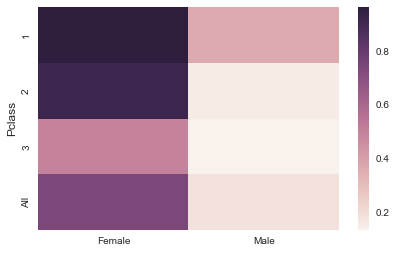

In [10]:
female = pivot.loc[:,('female','alive')] / (pivot.loc[:,('female','alive')] + pivot.loc[:,('female','dead')])
male = pivot.loc[:,('male','alive')] / (pivot.loc[:,('male','alive')] + pivot.loc[:,('male','dead')])
survival = pd.DataFrame({'Female': female, 'Male': male})
survival
sns.heatmap(survival)

In [11]:
print train_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
Gender         891
alive?         891
Age Bin        891
dtype: int64


## Eliminate the missing elements in the column that we care about

In [12]:
train_df = train_df[~np.isnan(train_df.Age)]
train_df.count()

PassengerId    714
Survived       714
Pclass         714
Name           714
Sex            714
Age            714
SibSp          714
Parch          714
Ticket         714
Fare           714
Cabin          185
Embarked       712
Gender         714
alive?         714
Age Bin        714
dtype: int64

## Plot the distribution of ages

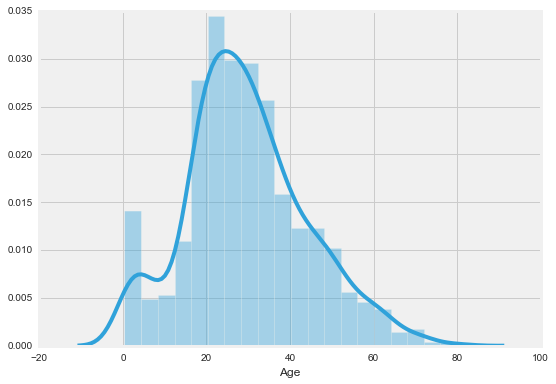

In [13]:
plt.figure(figsize=(8,6))
sns.distplot(train_df.Age)

## Plot the scatterplot matrix as well to identify likely predictors

## Creating Dummy Variables

In each case, when we build the dummy variables, we'll always leave one out to avoid issues with co-linearity.

In [14]:
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,alive?,Age Bin
390,391,1,1,"Carter, Mr. William Ernest",male,36,1,2,113760,120.0000,B96 B98,S,1,alive,adult
424,425,0,3,"Rosblom, Mr. Viktor Richard",male,18,1,1,370129,20.2125,NaN,S,1,dead,teen
234,235,0,2,"Leyson, Mr. Robert William Norman",male,24,0,0,C.A. 29566,10.5000,NaN,S,1,dead,adult
582,583,0,2,"Downton, Mr. William James",male,54,0,0,28403,26.0000,NaN,S,1,dead,middle_aged
702,703,0,3,"Barbara, Miss. Saiide",female,18,0,1,2691,14.4542,NaN,C,0,dead,teen


In [15]:
class_dummies = pd.get_dummies(train_df['Pclass'], prefix='class').iloc[:, 1:]
class_dummies.head(5)

,class_2,class_3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [16]:
sex_dummies = pd.get_dummies(train_df['Sex']).iloc[:, 1:]
sex_dummies.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [17]:
embarked_dummies = pd.get_dummies(train_df['Embarked']).iloc[:, 1:]
embarked_dummies.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [18]:
data = train_df.join([class_dummies, sex_dummies, embarked_dummies])
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,alive?,Age Bin,class_2,class_3,male,Q,S
269,270,1,1,"Bissette, Miss. Amelia",female,35,0,0,PC 17760,135.6333,C99,S,0,alive,adult,0,0,0,0,1
606,607,0,3,"Karaic, Mr. Milan",male,30,0,0,349246,7.8958,NaN,S,1,dead,adult,0,1,1,0,1
204,205,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18,0,0,A/5 3540,8.0500,NaN,S,1,alive,teen,0,1,1,0,1
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49,1,0,PC 17572,76.7292,D33,C,0,alive,middle_aged,0,0,0,0,0
294,295,0,3,"Mineff, Mr. Ivan",male,24,0,0,349233,7.8958,NaN,S,1,dead,adult,0,1,1,0,1


## Model Structure

The model can be determine in two ways. Arguably, the most easy to read is through the R-style formula definitions as defined by [Stats Model Formulas](http://statsmodels.sourceforge.net/devel/example_formulas.html).

The model is formally defined using the `patsy` language at [Patsy Docs](http://patsy.readthedocs.org/en/latest/overview.html)

The formula takes the form
   
    dependent_var ~ indep_var1 + indep_var2 + ...

Key elements for constructing the structure of the model:

*  '+' adds new variables 
*  '-' can subtract variables, for instance '-1' removes the intercept
*  '*' takes the product of the two variables
*  np.fn(.) will take a vectorized function of a variable
* 'C(.)' will force the treatment of a variable as categorical (rather then numeric)

## Linear Regression through Ordinary Least Squares

In [19]:
# Ordinary least squares using R-style equations
#
model = ols(data=data, formula='Survived ~ Age + class_2 + class_3 + male + Q + S')

# fit the model
result = model.fit()

In [20]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     76.67
Date:                Sat, 09 Apr 2016   Prob (F-statistic):           1.14e-73
Time:                        16:01:54   Log-Likelihood:                -326.50
No. Observations:                 714   AIC:                             667.0
Df Residuals:                     707   BIC:                             699.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.1652      0.054     21.491      0.000         1.059     1.272
Age           -0.0053      0.001     -4.878      0.000        -0.007    -0.003
class_2       -0.1802      0.044     -4.125      0.000        -0.266    -0.094
class_3       -0.3789      0.040     -9.394      0.000        -0.458    -0.300
male          -0.4760      0.031    -15.457      0.000        -0.536    -0.416
Q             -0.1212      0.082     -1.473      0.141        -0.283     0.040
S             -0.0813      0.040     -2.045      0.041        -0.159    -0.003
==============================================================================
Omnibus:                       25.115   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.078
Skew:                           0.477   Prob(JB):                     1.32e-06
Kurtosis:                       3.039   Cond. No.                         198.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Testing Our Residuals

In [21]:
# the model fit will actually produce the residuals without
# any additional work
residuals = result.resid

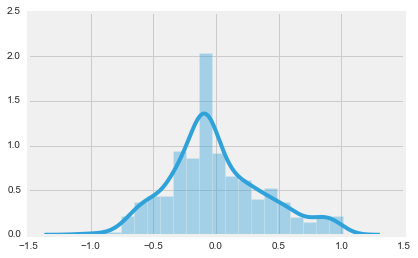

In [22]:
fig = sns.distplot(residuals)

## The QQ Plot

A great explanation adapted from one provided by Clay Ford at the University of Virginia.

> The Q-Q plot, or quantile-quantile plot, is a graphical tool to help assess if a set of data plausibly came from some theoretical distribution such as a Normal or exponential. For example, if we run a statistical analysis that assumes our dependent variable is Normally distributed, we can use a Normal Q-Q plot to check that assumption. It’s just a visual check, not an air-tight proof, so it is somewhat subjective. But it allows us to see at-a-glance if our assumption is plausible, and if not, how the assumption is violated and what data points contribute to the violation.

> A Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a line that’s roughly straight. Now what are “quantiles”? These are often referred to as “percentiles”. These are points in your data below which a certain proportion of your data fall. For example, imagine the classic bell-curve standard Normal distribution with a mean of 0. The 0.5 quantile, or 50th percentile, is 0. Half the data lie below 0. That’s the peak of the hump in the curve. The 0.95 quantile, or 95th percentile, is about 1.64. 95 percent of the data lie below 1.64. The following R code generates the quantiles for a standard Normal distribution from 0.01 to 0.99 by increments of 0.01.

> In other words, quantiles are basically just your data sorted in ascending order, with various data points labelled as being the point below which a certain proportion of the data fall. However it’s worth noting there are many ways to calculate quantiles.

> Q-Q plots take your sample data, sort it in ascending order, and then plot them versus quantiles calculated from a theoretical distribution. The number of quantiles is selected to match the size of your sample data. While Normal Q-Q Plots are the ones most often used in practice due to so many statistical methods assuming normality, Q-Q Plots can actually be created for any distribution.

### Interpreting the QQ Plot

![QQ Plot Interpretation](../images/QQ_plot_interpretation.png)

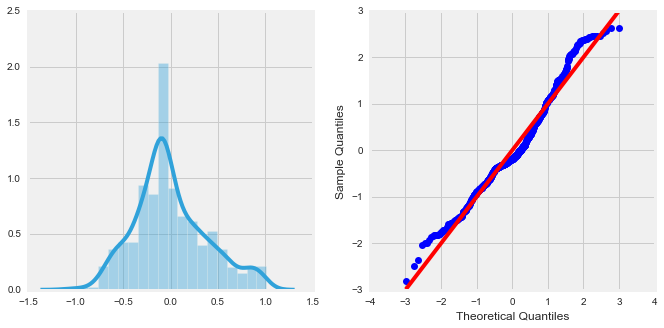

In [23]:
# Checking the residuals
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
sns.distplot(residuals, ax=axes[0]);
sm.qqplot(residuals, fit=True, line='s', ax=axes[1]);

## Using model for predicting results on the test data set

In [24]:
# Let's set up a URL to the file, which in this case is hosted on Github
test_url = 'titanic/titanic_test.csv'
url_test = base_url + test_url

test_df = pd.read_csv(url_test)
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [25]:
test_df.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
198,1090,2,"Baimbrigge, Mr. Charles Robert",male,23,0,0,C.A. 31030,10.5000,NaN,S
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
155,1047,3,"Duquemin, Mr. Joseph",male,24,0,0,S.O./P.P. 752,7.5500,NaN,S
19,911,3,"Assaf Khalil, Mrs. Mariana (Miriam"")""",female,45,0,0,2696,7.2250,NaN,C
405,1297,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20,0,0,SC/PARIS 2166,13.8625,D38,C


In [26]:
test_df = test_df[~np.isnan(test_df.Age)]
test_df.count()

PassengerId    332
Pclass         332
Name           332
Sex            332
Age            332
SibSp          332
Parch          332
Ticket         332
Fare           331
Cabin           87
Embarked       332
dtype: int64

In [27]:
class_dummies = pd.get_dummies(test_df['Pclass'], prefix='class').iloc[:, 1:]
sex_dummies = pd.get_dummies(test_df['Sex']).iloc[:, 1:]
embarked_dummies = pd.get_dummies(test_df['Embarked']).iloc[:, 1:]

test_data = test_df.join([class_dummies, sex_dummies, embarked_dummies])
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,class_2,class_3,male,Q,S
count,332.000000,332.000000,332.000000,332.000000,332.000000,331.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,1100.063253,2.144578,30.272590,0.481928,0.397590,40.982087,0.265060,0.439759,0.617470,0.066265,0.686747
std,122.763173,0.846283,14.181209,0.874084,0.810651,61.228558,0.442031,0.497107,0.486739,0.249120,0.464516
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,992.750000,1.000000,21.000000,0.000000,0.000000,8.050000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1099.500000,2.000000,27.000000,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1210.250000,3.000000,39.000000,1.000000,1.000000,40.633350,1.000000,1.000000,1.000000,0.000000,1.000000
max,1307.000000,3.000000,76.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
test_data['Prediction'] = result.predict(test_data)

In [29]:
test_data.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,class_2,class_3,male,Q,S,Prediction
354,1246,3,"Dean, Miss. Elizabeth Gladys Millvina""""",female,0.17,1,2,C.A. 2315,20.5750,NaN,S,0,1,0,0,1,0.704067
125,1017,3,"Cribb, Miss. Laura Alice",female,17.00,0,1,371362,16.1000,NaN,S,0,1,0,0,1,0.615029
232,1124,3,"Wiklund, Mr. Karl Johan",male,21.00,1,0,3101266,6.4958,NaN,S,0,1,1,0,1,0.117889
253,1145,3,"Salander, Mr. Karl Johan",male,24.00,0,0,7266,9.3250,NaN,S,0,1,1,0,1,0.102018
20,912,1,"Rothschild, Mr. Martin",male,55.00,1,0,PC 17603,59.4000,NaN,C,0,0,1,0,0,0.398215


## Logistic Regression Model Estimation

In [30]:
model_logistic = logit(data=data, formula='Survived ~ Age + class_2 + class_3 + male + Q + S')

# fit the model
result_logistic = model_logistic.fit()
result_logistic.summary()

Optimization terminated successfully.
         Current function value: 0.450359
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      707
Method:                           MLE   Df Model:                            6
Date:                Sat, 09 Apr 2016   Pseudo R-squ.:                  0.3332
Time:                        16:01:55   Log-Likelihood:                -321.56
converged:                       True   LL-Null:                       -482.26
                                        LLR p-value:                 2.112e-66
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      4.0483      0.431      9.401      0.000         3.204     4.892
Age           -0.0359      0.008     -4.661      0.000        -0.051    -0.021
class_2       -1.1483      0.291     -3.949      0.000        -1.718    -0.578
class_3       -2.4133      0.291     -8.286      0.000        -2.984    -1.843
male          -2.5227      0.209    -12.064      0.000        -2.933    -2.113
Q             -0.8243      0.568     -1.452      0.147        -1.937     0.289
S             -0.5032      0.266     -1.889      0.059        -1.025     0.019
==============================================================================
"""

In [31]:
# log odds ratios
logistic_params = result_logistic.params
np.exp(logistic_params)

Intercept    57.300964
Age           0.964731
class_2       0.317177
class_3       0.089516
male          0.080240
Q             0.438535
S             0.604566
dtype: float64